## Load Basic Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import set_option
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import ModelCheckpoint
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


## Load the Data

In [2]:
df = pd.read_csv('musk_csv.csv')

In [3]:
df.head() # returns the first five rows of the data set by default

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,...,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,...,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,...,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,...,-60,-4,52,104,137,168,-60,-135,80,1


In [4]:
df.tail() # returns the last 5 rows of the data set by default

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
6593,6594,NON-MUSK-jp13,jp13_2+5,51,-123,-23,-108,-117,134,-160,...,-66,164,-14,-29,107,171,-44,-115,118,0
6594,6595,NON-MUSK-jp13,jp13_2+6,44,-104,-19,-105,-117,142,-165,...,-51,166,-9,150,129,158,-66,-144,-5,0
6595,6596,NON-MUSK-jp13,jp13_2+7,44,-102,-19,-104,-117,72,-165,...,90,117,-8,150,130,159,-66,-144,-6,0
6596,6597,NON-MUSK-jp13,jp13_2+8,51,-121,-23,-106,-117,63,-161,...,86,99,-14,-31,106,171,-44,-116,117,0
6597,6598,NON-MUSK-jp13,jp13_2+9,51,-122,-23,-106,-117,190,-161,...,40,124,-14,-30,107,171,-44,-115,118,0


In [5]:
# Check the data types 
df.dtypes

ID                    int64
molecule_name        object
conformation_name    object
f1                    int64
f2                    int64
f3                    int64
f4                    int64
f5                    int64
f6                    int64
f7                    int64
f8                    int64
f9                    int64
f10                   int64
f11                   int64
f12                   int64
f13                   int64
f14                   int64
f15                   int64
f16                   int64
f17                   int64
f18                   int64
f19                   int64
f20                   int64
f21                   int64
f22                   int64
f23                   int64
f24                   int64
f25                   int64
f26                   int64
f27                   int64
                      ...  
f138                  int64
f139                  int64
f140                  int64
f141                  int64
f142                

In [7]:
 # there are 6598 rows and 170 columns
df.shape

(6598, 170)

## Statistical Analysis

In [8]:
df.isnull().sum() 

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
f3                   0
f4                   0
f5                   0
f6                   0
f7                   0
f8                   0
f9                   0
f10                  0
f11                  0
f12                  0
f13                  0
f14                  0
f15                  0
f16                  0
f17                  0
f18                  0
f19                  0
f20                  0
f21                  0
f22                  0
f23                  0
f24                  0
f25                  0
f26                  0
f27                  0
                    ..
f138                 0
f139                 0
f140                 0
f141                 0
f142                 0
f143                 0
f144                 0
f145                 0
f146                 0
f147                 0
f148                 0
f149                 0
f150       

There are no null values

In [14]:
set_option('precision', 3)
print(df.describe())

             ID        f1        f2        f3        f4        f5        f6  \
count  6598.000  6598.000  6598.000  6598.000  6598.000  6598.000  6598.000   
mean   3299.500    58.945  -119.129   -73.147    -0.628  -103.533    18.360   
std    1904.823    53.249    90.813    67.956    80.445    64.388    80.594   
min       1.000   -31.000  -199.000  -167.000  -114.000  -118.000  -183.000   
25%    1650.250    37.000  -193.000  -137.000   -70.000  -117.000   -28.000   
50%    3299.500    44.000  -149.000   -99.000   -25.000  -117.000    33.000   
75%    4948.750    53.000   -95.000   -19.000    42.000  -116.000    74.000   
max    6598.000   292.000    95.000    81.000   161.000   325.000   200.000   

             f7        f8        f9  ...      f158      f159      f160  \
count  6598.000  6598.000  6598.000  ...  6598.000  6598.000  6598.000   
mean    -14.109    -1.858   -86.003  ...  -184.798   -75.796   -26.073   
std     115.316    90.373   108.327  ...   107.820   127.861    69

##### we have different mean value and can opt for standardizing the data.

In [15]:
# class distribution
print(df.groupby('class').size())

class
0    5581
1    1017
dtype: int64


 0 indicated Not Musk 
 and 1 indicates Musk

In [10]:
df.corr() # it is difficult to observe the correlation, hence lets plot it

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
ID,1.000000,-0.197844,0.119750,0.179274,0.248703,-0.106119,0.165094,-0.140705,0.430635,-0.179556,...,0.057309,0.046844,-0.224905,-0.148977,-0.328034,0.291805,0.039315,-0.196997,-0.043655,-0.625410
f1,-0.197844,1.000000,-0.142464,-0.164292,-0.291054,0.001037,0.090659,0.071879,-0.416191,0.090701,...,0.010485,0.146428,-0.153096,0.002383,0.634797,-0.061317,0.142004,0.443060,-0.057199,-0.120883
f2,0.119750,-0.142464,1.000000,0.611675,-0.244145,-0.134689,0.125947,-0.449526,0.187318,-0.484187,...,0.172481,0.309392,0.339496,-0.030338,-0.118212,-0.028524,-0.069193,-0.133091,0.046361,-0.099896
f3,0.179274,-0.164292,0.611675,1.000000,-0.378516,-0.080964,0.210432,-0.754798,0.426254,-0.760313,...,0.261200,0.502924,0.259424,-0.020607,-0.206860,-0.131828,-0.111005,-0.086150,0.020434,-0.089760
f4,0.248703,-0.291054,-0.244145,-0.378516,1.000000,-0.044896,-0.222191,0.453786,0.185135,0.420407,...,-0.308906,-0.607435,-0.279430,-0.118705,-0.241346,0.182826,-0.189530,-0.364233,0.072985,-0.098592
f5,-0.106119,0.001037,-0.134689,-0.080964,-0.044896,1.000000,0.024860,0.045389,-0.162539,0.064376,...,0.004808,0.019286,0.225484,0.195782,0.103419,0.027131,-0.046188,-0.090038,-0.081910,-0.045040
f6,0.165094,0.090659,0.125947,0.210432,-0.222191,0.024860,1.000000,-0.238260,0.002716,-0.230350,...,0.179304,0.551549,0.056876,0.043218,0.062755,0.046881,0.024317,0.002557,-0.050493,-0.089248
f7,-0.140705,0.071879,-0.449526,-0.754798,0.453786,0.045389,-0.238260,1.000000,-0.387768,0.802427,...,-0.273047,-0.574676,-0.263716,-0.007488,0.120020,0.131520,0.049882,0.000166,0.004980,0.113093
f8,0.430635,-0.416191,0.187318,0.426254,0.185135,-0.162539,0.002716,-0.387768,1.000000,-0.407809,...,0.009139,0.034078,-0.003369,-0.102444,-0.353299,-0.090044,-0.266026,-0.298356,0.138932,-0.201554
f9,-0.179556,0.090701,-0.484187,-0.760313,0.420407,0.064376,-0.230350,0.802427,-0.407809,1.000000,...,-0.268116,-0.540391,-0.234395,0.011911,0.145991,0.127985,0.058630,0.016455,-0.002590,0.147509


### Unimodal Data Visualization

##### Histograms

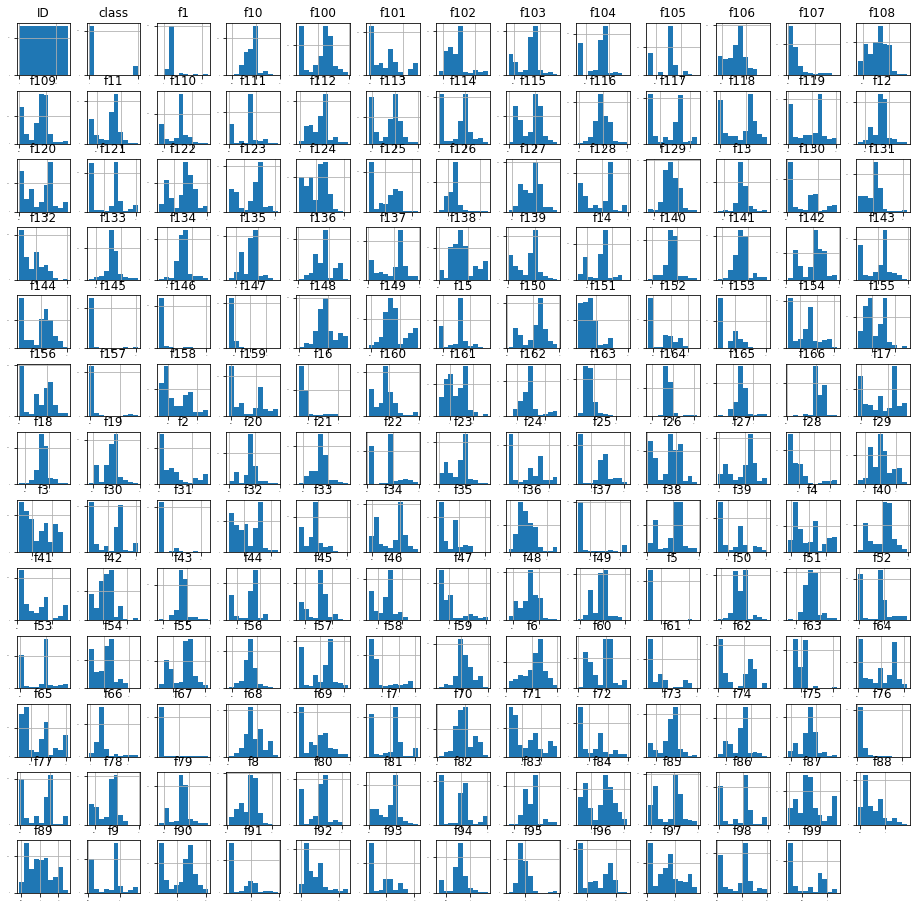

In [17]:
df.hist(sharex=False, sharey=False, xlabelsize=1,ylabelsize=1,figsize=(16,16) );

#### Density Plots

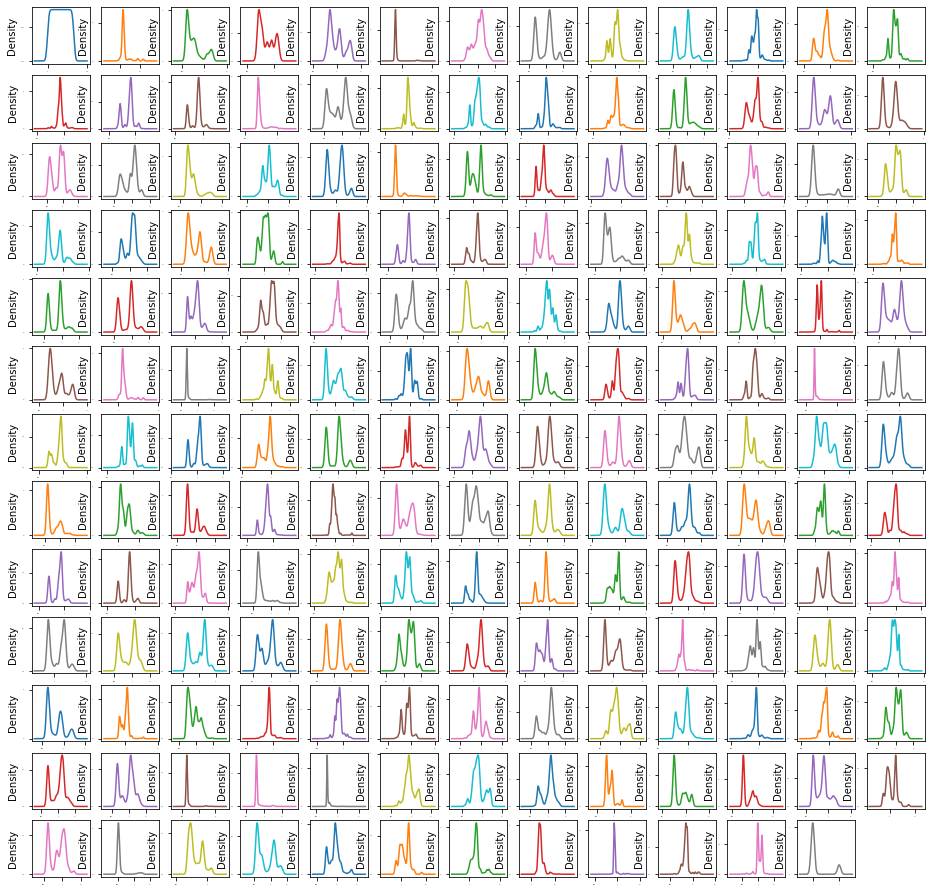

In [20]:
df.plot(kind='density', subplots=True, layout=(13,13), sharex=False, legend=False, figsize=(16,16), fontsize=1)
plt.show()

### Multimodal Plots

#### Correlation Matrix

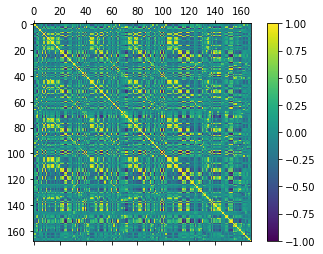

In [23]:
fig= plt.figure()
ax= fig.add_subplot(111)
cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
plt.show()

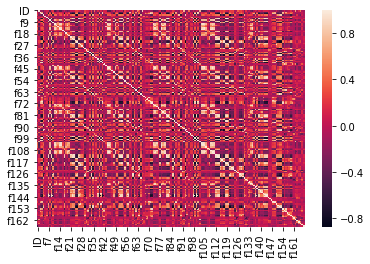

In [24]:
sns.heatmap(df.corr(), annot=False ) # plot using seaborn

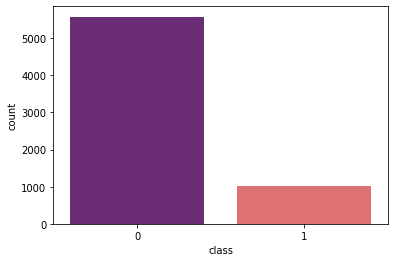

In [26]:
sns.countplot(x='class', data= df, palette='magma')

### Neural Network Model

In [3]:
# fix random seed for reproducibility
seed =7 
numpy.random.seed(seed)

### Split the data set

In [4]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()


In [5]:
df['molecule_name']=labelencoder.fit_transform(df.loc[:,['molecule_name']].astype(str))
df['conformation_name']=labelencoder.fit_transform(df.loc[:,['conformation_name']].astype(str))

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [9]:
X = df.iloc[:, 0:169] # X is input 
Y= df.iloc[:, 169]  # Y is the output

In [23]:
# larger model
def create_larger():
# create Model    
    model = Sequential()
    model.add(Dense(60, input_dim=169, kernel_initializer='normal', activation='relu'))
    model.add(Dense(30, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
# Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
estimators = []
estimators.append(('standardize', StandardScaler()))
estimators.append(('mlp', KerasClassifier(build_fn=create_larger, epochs=100, batch_size=10,
verbose=0)))
pipeline = Pipeline(estimators)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(pipeline, X, encoded_Y, cv=kfold)
print("Larger: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))



KeyboardInterrupt: 

In [59]:
create_larger()

#### The Model is showing 100% accuracy

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


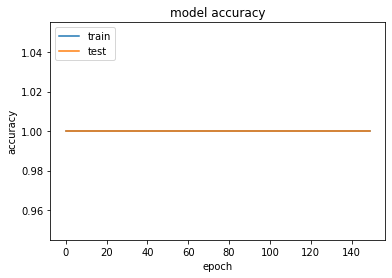

In [50]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
history = model.fit(X, Y, validation_split=0.20, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

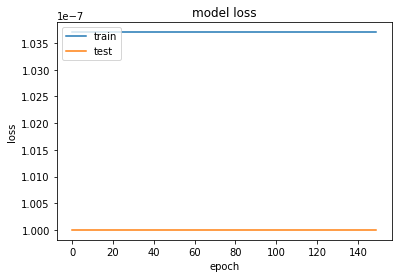

In [51]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
X_train , X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state= seed)

In [19]:
def get_model(X_train, Y_train):
    
    
# define model
    model = Sequential()
    model.add(Dense(100, input_dim=169, activation='relu'))
    model.add(Dense(50,kernel_initializer='normal', activation='relu')) 
    model.add(Dense(1, activation='sigmoid'))
    
# compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
# fit model
    history=model.fit(X_train,Y_train, epochs=300, verbose=0)
    return model


# get_model
model = get_model(X_train, Y_train)


# predict probabilities for test set
yhat_probs = model.predict(X_validation, verbose=0)
# predict crisp classes for test set
yhat_classes = model.predict_classes(X_validation, verbose=0)


# reduce to 1d array
yhat_probs = yhat_probs[:, 0]
yhat_classes = yhat_classes[:, 0]



In [20]:
# evaluate the model
train_acc = model.evaluate(X_train, Y_train, verbose=0)
test_acc = model.evaluate(X_validation, Y_validation, verbose=0)


#### Metric for Algorthim Evaluation

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_validation, yhat_classes)
print('Accuracy: %f' % accuracy)

# precision tp / (tp + fp)
precision = precision_score(Y_validation, yhat_classes)
print('Precision: %f' % precision)

# recall: tp / (tp + fn)
recall = recall_score(Y_validation, yhat_classes)
print('Recall: %f' % recall)

# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_validation, yhat_classes)
print('F1 score: %f' % f1)

# Classisication report
clas_rep = classification_report(Y_validation , yhat_classes)
print( clas_rep)


# ROC AUC
auc = roc_auc_score(Y_validation, yhat_probs)
print('ROC AUC: %f' % auc)

# confusion matrix
matrix = confusion_matrix(Y_validation, yhat_classes)
print(matrix)

Accuracy: 1.000000
Precision: 1.000000
Recall: 1.000000
F1 score: 1.000000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1118
           1       1.00      1.00      1.00       202

    accuracy                           1.00      1320
   macro avg       1.00      1.00      1.00      1320
weighted avg       1.00      1.00      1.00      1320

ROC AUC: 1.000000
[[1118    0]
 [   0  202]]
